<a href="https://colab.research.google.com/github/leukschrauber/learning_portfolio/blob/main/assignments/Assignment_Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Framing the Problem
Your task is to build a machine learning model that predicts house prices in King County, an area in the US state of Washington, as described in Chapter 2 of the book *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow*. Please read chapter 2 carefully in parallel. Your model should learn from the given data and be able to predict new home prices using the given metrics. Let's take a look at our given dataset:

The following code imports some packages, mounts the Google Drive folder and loads the data. Run the code and adapt the file paths!

In [ ]:
import pandas as pd
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
import numpy as np
data_table.enable_dataframe_formatter()

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/SE_Digital_Organizations/kc_house_data.csv")

data.head(10)

Mounted at /content/drive


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
5,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
6,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327
7,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315
8,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337
9,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031


Description of the dataset
* id: a notation for a house
* date: Date house was sold
* price: Price is prediction target
* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: square footage of the home 
* sqft_lot: square footage of the lot 
* floors: Total floors (levels) in house 
* waterfront: House which has a view to a waterfront
* view: Has been viewed
* condition: How good the condition is Overall 
* grade: overall grade given to the housing unit, based on King County grading system 
* sqft_above: square footage of house apart from basement 
* sqft_basement: square footage of the basement 
* yr_built: Built Year 
* yr_renovated: Year when house was renovated 
* zipcode: zip code 
* lat: Latitude coordinate 
* long: Longitude coordinate

See chapters 1 & 2 for all questions below!

**What is a machine learning pipeline? Please make a fictitious example that is appropriate for our data set.**

A sequence of data processing components is called a **data pipeline**. Pipelines are very common in machine learning systems, since there is a lot of data to manipulate and many data transformations to apply.

For our example, a couple of data manipulation tasks are required. Some of the data in the data set is skewed, requiring for example logarithmic transformation. Another task included in the pipeline might be to scale the data sets to a common scale of e.g., 0 to 1.

**Is our task a a supervised, unsupervised, semi-supervised, self-supervised, or reinforcement learning task? Is it a classification or regression task? Do we use batch or online learning?**

We try to predict housing prices. As all the housing prices are given in the dataset (labeled dataset), the task is about supervised learning. As we deal with a continous prediction variable, the task is a regression task. In particular, it is a multiple regression task, as we deal with multiple input variables. The data should be consistent enough and is small enough to train a batch learning model.

**What is a performance measure? Give two typical examples of performance measures in regression models. How can these be interpreted in a linear regression?**

A performance measure is used to determine the accuracy of any trained model on a test or validation set. Two typical measures for a regression model are the Root Mean Squared Error (RMSE) and the Mean Absolute Error (MAE). While the RMSE is more sensitive to outliers, it is the preferred measure when there is few outliers. Typically, these measures are evaluated against already in-production models or systems or if no such system exists, by expert judgement.

##Take a Quick Look at the Data Structure

Try to use the functions *head()*, *describe()* and *info()* to get further informations of the dataset. Additional use *value_counts()* to get all possible values of one variable. For all variables, consider whether they are categorical, ordinal, or numeric! Do you notice anything about the variable waterfront when you compare it with the variable renovated?

In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [ ]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
dtypes: flo

In [ ]:
data["yr_renovated"].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64


date -

price - numeric

bedrooms - numeric

bathrooms - numeric

sqft_living - numeric

sqft_lot - numeric

floors - numeric

waterfront - categorical

view - numeric

condition - ordinal

grade - ordinal

sqft_above - numeric

sqft_basement - numeric

yr_built - numeric

yr_renovated - categorical

zipcode - categorical

lat - numeric

long - numeric

The waterfont variable is categorical as it is a boolean. The yr_renovated variable is not boolean in the data. If a house was renovated, a year is given. We can assume that if it was not renovated since it was built, the value is 0. It might also just be missing though! Following our assumption, among houses renovated, it can be argued that it is certainly ordinal. However, over all data, we could either use it as a dichotomous variable (Boolean/Categorical) or impute the build date as the last year of renovation for 0 values.


Try to visualize the distributions of all the variables. (Use the *hist()* function from *matplotlib*.) Are some distributions skewed? What is right-skewed or left-skewed? Do the scales of the different variables differ? What do you notice with the variable *yr_renovated*?

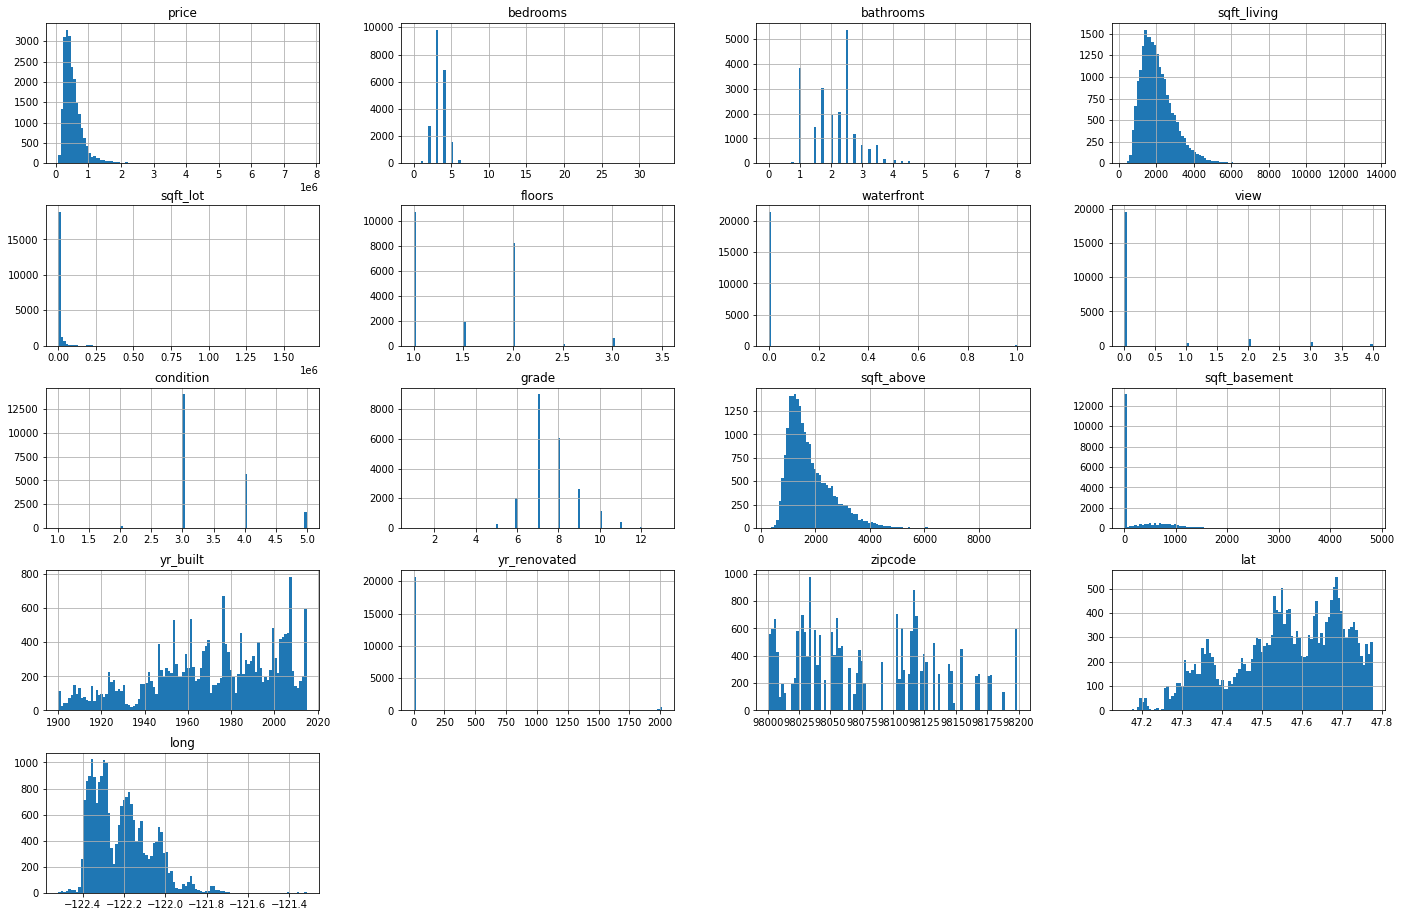

In [ ]:
data.hist(bins=100, figsize=(24, 16))
plt.show()

Unrenovated houses have the entry 0. With which variable could we replace the entry 0?

Your task is to clean the dataset: 

1. Divide the variable *yr_renovated* into two variables.
2. Create a binary variable that indicates whether the house has been renovated or not. (0 = no renovation, 1 = renovated) You can use the *cut()* function.
3. Additionally overwrite the variable *yr_renovated* with the maximum of yr_renovated and yr_built, you can use the max() function.
4. Change the *date* column to *datetime* with the function *to_datetime()*.

In [ ]:
# Some Data Cleaning
data['date'] = pd.to_datetime(data["date"])
data['renovated'] = data["yr_renovated"].clip(0,1)
data['yr_renovated'] = data[["yr_renovated", "yr_built"]].max(axis=1)

##Create a Test Set

**Try to explain what a *stratified sampling* is.** 

When applying statistical techniques to a set, a random sample might be used to draw conclusions towards the whole population. However, due to chance random sampling might over- or underrepresent certain characteristics of the general population. Let's assume that in our example, the grade is a perfect predictor for housing prices and a grade of 5 makes 50 % of the population. By random sampling, we might draw a sample where only 40 % of the sample have a grade of 5. Stratified sampling in contrast tries to preserve these important characteristics of the population in the sample by adding constaints to the randomness.

Try to create a stratified train and test set, which should be named *train_set* and *test_set*. Create an extra column for this, which divides the house prices from the dataset into different categories. At the end, overwrite your dataset with the training dataset with *data = train_set.copy()*.

In [ ]:
from sklearn.model_selection import train_test_split

data["price_cat"] = pd.cut(np.log(data["price"]), bins=10, labels=range(1,11))

train_set, test_set = train_test_split(data, test_size=0.2, stratify=data["price_cat"], random_state=42)

In [ ]:
data = train_set.copy()
data.head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated,price_cat
10252,2014-10-09,510000.0,3,3.00,1845,5100,2.0,0,2,5,8,1845,0,1947,1947,98056,47.5204,-122.208,0,5
11005,2014-06-23,600000.0,3,2.50,2260,10153,2.0,0,0,3,10,2260,0,1987,1987,98074,47.6410,-122.068,0,5
6034,2014-09-11,680000.0,2,2.00,1450,989,3.0,0,0,3,9,1450,0,2014,2014,98109,47.6354,-122.346,0,5
10636,2014-07-01,435000.0,3,2.50,2530,13446,2.0,0,0,3,9,2530,0,1993,1993,98019,47.7345,-121.961,0,4
12062,2014-09-23,617000.0,3,2.50,1910,4488,2.0,0,0,3,8,1910,0,1998,1998,98007,47.6176,-122.140,0,5
11786,2014-07-29,237502.0,3,1.00,980,7560,1.0,0,0,3,7,980,0,1951,1951,98126,47.5256,-122.375,0,3
8402,2014-11-07,248000.0,3,1.75,1330,9831,1.0,0,0,3,7,1330,0,1987,1987,98001,47.3304,-122.277,0,3
1121,2015-04-27,239000.0,3,1.00,940,8571,1.0,0,0,3,6,940,0,1950,1950,98146,47.5006,-122.336,0,3
3173,2014-12-17,490000.0,3,2.50,1890,10190,2.0,0,0,3,8,1890,0,1986,1986,98074,47.6478,-122.061,0,5
262,2014-12-16,525000.0,3,2.25,2100,40510,2.0,0,0,3,10,1320,780,1979,1979,98074,47.6154,-122.047,0,5


##Explore and Visualize the Data to Gain Insights

First, try to visualize the geographic dates (*lat*, *long*) from our dataset in a scatter plot. **Where are the expensive houses located?**

The expensive houses tend to be located in the northern region with a cluster in the central north.

For example, you can use a logarithmic color bar to see where it is cheaper and more expensive. **Consider how to combine the 'lat' and 'long' features into a simpler feature. (No implementation, but a consideration is sufficient).**

A simpler feature would be the proximity to identified expensive or cheap clusters using appropriate algorithms (KNN).

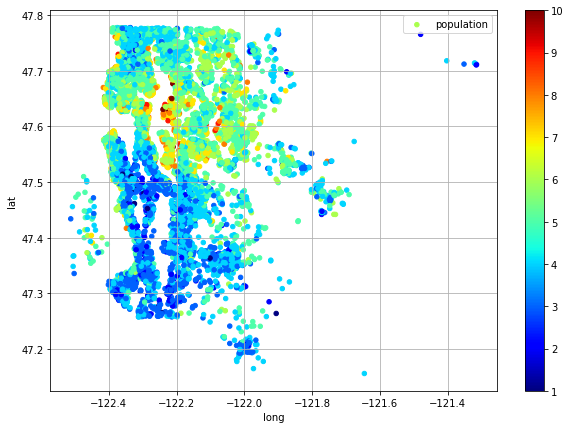

In [ ]:
data.plot(kind="scatter", x="long", y="lat", grid=True, c=data["price_cat"], cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10, 7))
plt.show()

### Correlations

Since the dataset does not have so many features, it is quite easy to calculate the correlations of these. Please calculate all meaningful standard correlation effects with the function *corr()*. **How can the values of this correlation effect be interpreted?**

The calculated correlations indicate linear relationships between continuous variables. The correlations range from -1 indicating a strong negative correlation to 1 indicating a strong positive correlation. However, non-linear relationships are neglected.

**What are probably the best variables to predict?**
Generally, a correlation of > 0.3 or < -0.3 is considered relevant by me. Following this, price correlates with: bedrooms, bathrooms, sqft_living, grade, sqft_above, sqft_basement, view.

**For which variables does the Pearson coefficient make sense and for which not?**

A correlation is also given for price and latitude. However, for latitude clusters seem to be a better predictor. Correlations also don't make sense for relationships with categorical variables e.g., zipcode data.

In [ ]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.105755,-0.053203,0.307003,0.021626,0.126092
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.165506,-0.152668,-0.008931,0.129473,0.018553
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.537164,-0.203866,0.024573,0.223042,0.050260
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.343745,-0.199430,0.052529,0.240223,0.055094
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.052911,-0.129574,-0.085683,0.229521,0.007745
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.505408,-0.059121,0.049614,0.125419,0.006260
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,-0.000537,0.030285,-0.014274,-0.041910,0.093294
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,-0.018264,0.084827,0.006157,-0.078400,0.104062
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.396358,0.003026,-0.014941,-0.106500,-0.060139
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.460796,-0.184862,0.114084,0.198372,0.014008


Additionally, create a scatter plot for the most important features using the Pandas scatter_matrix() function. **What do you notice about the variables sqft_living, sqft_above and sqft_basement?**

sqft_living: positive trend. covariance seems to increase for sqft outliers

sqft_above: pretty much same as sqft_living, maybe higher covariance

sqft_basement: general positive trend, however trend is not true for housing without basement, which is probably a separate category

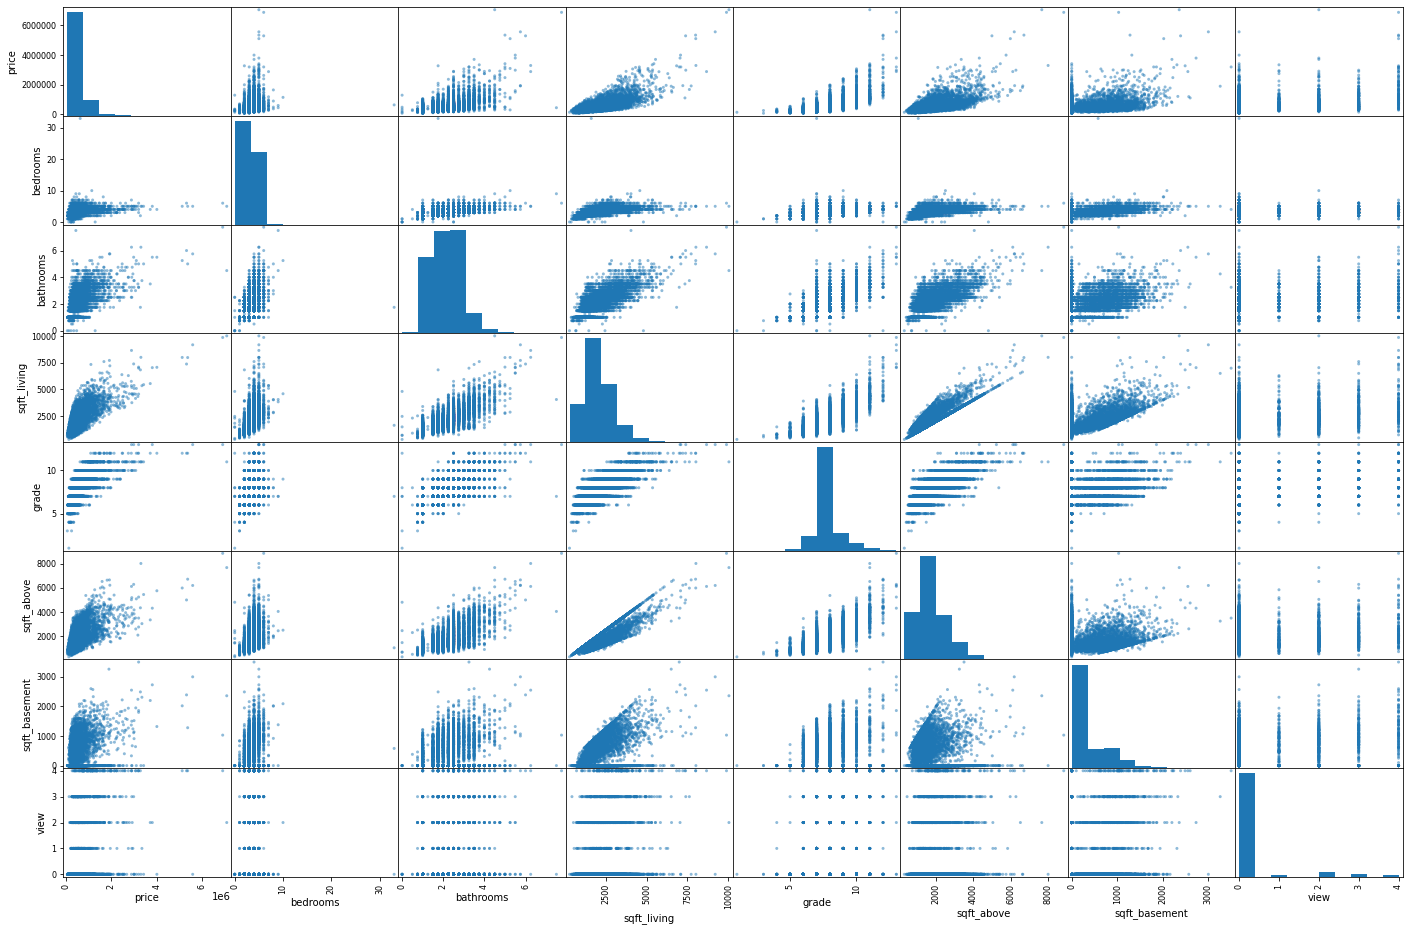

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["price", "bedrooms", "bathrooms", "sqft_living", "grade", "sqft_above", "sqft_basement", "view"]
scatter_matrix(data[attributes], figsize=(24, 16))
plt.show()

## Experiment with Attribute Combinations

Try to combine the columns bedrooms, sqft_living by calculating the bedroom density, i.e. *bedrooms/sqft_living*. Check the new Pearson Correlation coefficients.


In [ ]:
data["bedroom_density"] = data["bedrooms"] / data["sqft_living"]

data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated,bedroom_density
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.105755,-0.053203,0.307003,0.021626,0.126092,-0.468367
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.165506,-0.152668,-0.008931,0.129473,0.018553,0.062749
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.537164,-0.203866,0.024573,0.223042,0.050260,-0.517869
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.343745,-0.199430,0.052529,0.240223,0.055094,-0.678042
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.052911,-0.129574,-0.085683,0.229521,0.007745,-0.137271
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.505408,-0.059121,0.049614,0.125419,0.006260,-0.312995
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,-0.000537,0.030285,-0.014274,-0.041910,0.093294,-0.087301
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,-0.018264,0.084827,0.006157,-0.078400,0.104062,-0.220833
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.396358,0.003026,-0.014941,-0.106500,-0.060139,0.089792
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.460796,-0.184862,0.114084,0.198372,0.014008,-0.590345


##Prepare the Data for Machine Learning Algorithms

In the first step, we separate our trainings dataset with our labeled dataset.

In [ ]:
data = train_set.drop("price", axis=1)
data_label = train_set[["price"]].copy()

###Missing Data

**What options do we have to deal with missing values? What options do we have to deal with missing values?**

Basically, there are three options:


1.   Impute missing values by replacing the missing value with the median, mode or mean
2.   Drop the column where a value is missing.
3.   Drop the rows where a value is missing. (data items)



Write a code that give all lines, which have any missing value. 

**What is the function *SimpleImputer(strategy="median")* doing?**

It is replacing missing values by the median.

In [ ]:
data[data.isna().any(axis=1)]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated,price_cat


###Handling Text and Categorical Attributes


**What are ordinal and categorical data?**
Categorical data are variables, whose data is only dividable into groups. Sometimes, these groups can be brought into a logical order such as "Bad, Average, Good". Then, the variable is considered to be ordinal.

**Do we have such data in our data set?**

waterfront - categorical

condition - ordinal

grade - ordinal

zipcode - categorical

**What possibilities do we have to transform this data correctly?**



1.   Encode categories to numerical values
2.   One-Hot-Encoding into sparse or dense matrix



**What are dummy attributes?**
Dummy-Attributes refer to the binary matrix representation of categorical variables.

**Try to understand what the function *OneHotEncoder()* does with the variable waterfront.**

It identifies categories and transforms them to  matrix, where each row only has one 1 marking the belonging to a category. There are advantages to .getdummes() of pandas.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

waterfront_encoded = cat_encoder.fit_transform(data[["waterfront"]])

##Feature Scaling and Transformation

**What is min-max scaling and standardization of features?**

In general, scaling is necessary because many ML algorithms work better with scaled features. 

In min-max scaling, features are scaled on a scale from zero to one. This is performed by subtracting the min value and dividing by the difference between the min and the max.

Standardization is different: first it subtracts the mean value (so standardized values have a zero mean), then it divides the result by the standard deviation (so standardized values have a standard deviation equal to 1. Unlike min-max scaling, standardization does not restrict values to a specific range. However, standardization is much less affected by outliers.

**What is a heavy tail in a distribution?**

Right-skewed distributions: long stretch on the right side of a distribution 


**What problem do we have with min-max scaling and standardization on a heavy-tailed distribution? Can you make an example?**

Both approaches squash the scaled feature into a small range, so that a transformation is required beforehand, e.g., by applying a logarithmic transformation to the data. An example is the sqft_above attribute. Here, the two approaches would squash the values into a small range. Thus, a logarithmic transformation is applied. The example is illustrated below.



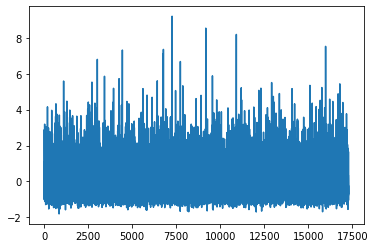

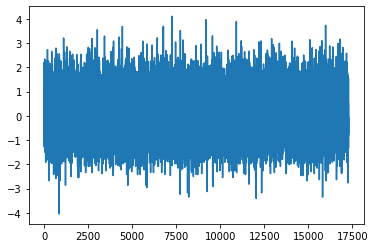

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
sqft_above_std_scaled = std_scaler.fit_transform(data[["sqft_above"]])

data['sqft_above_log'] = np.log(data['sqft_above'])
sqft_above_log_std_scaled = std_scaler.fit_transform(data[["sqft_above_log"]])

plt.figure(0)
plt.plot(sqft_above_std_scaled)
plt.figure(1)
plt.plot(sqft_above_log_std_scaled)

plt.show()

In [ ]:
data.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'renovated', 'price_cat'],
      dtype='object')

**Try to brainstorm which variable conversion makes sense for which variable!** 

* id: None
* date: None
* price: Logarithmic + Scaling
* bedrooms: Bedroom Density + Logarithmic + Scaling
* bathrooms: Bathroom Density + Logarithmic + Scaling
* sqft_living: Logarithmic + Scaling
* sqft_lot: Logarithmic + Scaling 
* floors: Logarithmic + Scaling 
* waterfront: One-Hot-Encoding
* view: Logarithmic + Scaling
* condition: Logarithmic + Scaling 
* grade: Logarithmic + Scaling
* sqft_above: Logarithmic + Scaling 
* sqft_basement: Logarithmic + Scaling 
* yr_built: years since built + Logarithmic + Scaling 
* yr_renovated: years since renovated + Logarithmic + Scaling 
* zipcode: Clustering
* lat: Clustering 
* long: Clustering

Write down your guess! **Try to understand the following two code blocks, how are the variables *long* and *lat* converted?**

The data is divided into 15 geographical clusters by using KMeans based on price. Then, the maximum similarity to each cluster is extracted for each data point and mapped onto a graph together with the cluster centers.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


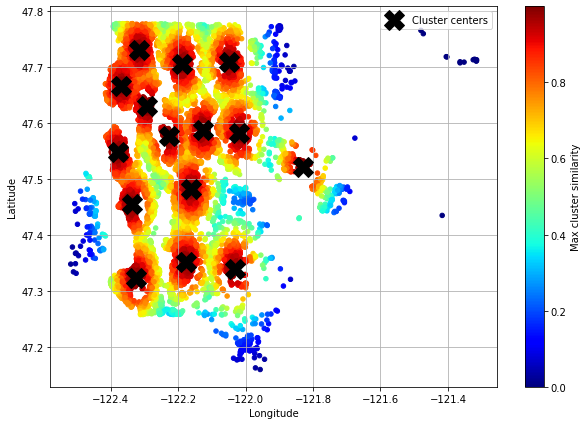

In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)
similarities = cluster_simil.fit_transform(data[["lat", "long"]],
                                           sample_weight=data_label["price"])

data_renamed = data.rename(columns={
    "lat": "Latitude", "long": "Longitude"})

data_renamed["Max cluster similarity"] = similarities.max(axis=1)

data_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")

plt.show()

Have a look at my suggestion of variable conversion. I ask you to understand the code in detail, **what variable transformations have I made?**

In total, there a are six distinct data pipelines which are applied to different variable types.

log_pipeline, ["sqft_living", "sqft_lot", "sqft_above"] => Apply logarithmic transformation + Standardization

"geo", cluster_simil, ["lat", "long"] => Apply clustering to latitude and longitude

"cat", cat_pipeline, ["waterfront", "renovated"] => One-Hot-Encoding of categories

"date", date_pipeline, ["date"] => Calculate timely distance to now and standardize

"normal", default_num_pipeline, ["yr_built", "yr_renovated", "bedrooms", "bathrooms", "floors", "view", "condition", "grade"] => Standardization

 ("log", label_pipeline, ["price"]) => Logarithmic transformation

**What arguments are in favor, and what arguments might be against? How would you convert the variables if you compare it with your guess?**

I pretty much agreed with the selected transformations. However, I might have transformed more variables logarithmically before standardizing them, because lots of them appear to be skewed or multi-modal. It might help the ML algorithm to transform more.

Also, I would also calculate timely distance for yr_built and yr_renovated to make the model less vulnerable to data drift.

Furthermore, density measure on rooms like bathroom and bedroom might result in better correlations and might help the model make better predictions.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder

def time(X):
 a =  pd.to_datetime("now") - X[X.columns[0]]
 a = a.dt.total_seconds()
 return a.to_frame()

date_pipeline = make_pipeline(
 FunctionTransformer(time),
 StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)

default_num_pipeline = make_pipeline(StandardScaler())

log_pipeline = make_pipeline(
 FunctionTransformer(np.log),
 StandardScaler())

label_pipeline = make_pipeline(
 FunctionTransformer(np.log)) 

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
 ("log", log_pipeline, ["sqft_living", "sqft_lot", "sqft_above"]),
 ("geo", cluster_simil, ["lat", "long"]),
 ("cat", cat_pipeline, ["waterfront", "renovated"]),
 ("date", date_pipeline, ["date"]),
 ("normal", default_num_pipeline, ["yr_built", "yr_renovated", "bedrooms", "bathrooms", "floors", "view", "condition", "grade"])
 ])

preprocessing_label = ColumnTransformer([
 ("log", label_pipeline, ["price"])
 ])

**How many features do we have for predicition?**

31

In [ ]:
data_prepared = preprocessing.fit_transform(data)
data_prepared.shape

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


(17290, 31)

##Select and Train a Model

###Linear Model

The following code determines a linear regression model, again **try to explain what the code computes!**

The code below connects our processing pipeline to a LineaRegression-Model from SKLearn. Following, the multiple regression model is fitted on our train data. As the last element in the pipeline is a Predictor, we can call the predict-method on the pipeline. 

In [ ]:
from sklearn.linear_model import LinearRegression

data_label_transformed = preprocessing_label.fit_transform(data_label)

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(data, data_label_transformed)

data_predictions = lin_reg.predict(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


Your task is to determine the median of the absolute error [Median(ABS(a-b))] (In addition, you can also get the percentage error by dividing by the actual sales value before taking the median.) and the Root Mean Square Error (RMSE)! Remember that estimates are logarithmic. Also calculate the median of all home prices. And try to evaluate all error values. **How good is the model?**

On average, the model is quite good as the median values are roughly the same. However, the median absolute error is 50.592. Meaning that 50 % of the predictions are even worse than that. The RMSE of 150.000 is really not a great indicator for the model at all. As the house prices are on median around 450.000, being a third off averagely is really not great.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

rmse = mean_squared_error(np.exp(data_label_transformed), np.exp(data_predictions), squared=False)
mae = median_absolute_error(np.exp(data_label_transformed), np.exp(data_predictions))

median_pred = np.median(np.exp(data_predictions))
median_actual = np.median(np.exp(data_label_transformed))

print(rmse)
print(mae)
print(median_pred)
print(median_actual)

149204.25001416245
50592.42641297661
457683.9581278886
450000.00000000035


###Random Forest Regressor

We will now also compute a Radom Forrest model, automatically determining a cross validation with n = 10 on the training dataset. **What happens during the cross validation?**

It randomly splits the training set into 10 nonoverlapping subsets called folds,
then it trains and evaluates the decision tree model 10 times, picking a different fold for evaluation every time and using the other 9 folds for training. The result is an array containing the 10 evaluation scores

**Why have I adjusted the R squared error with a separate function?**

Maybe because the data is still in logarithmic transformation and needs to be transformed back? Unsure actually.

**What is the function *np.ravel* doing?**

Transforms an multiple dimension array into a 1D-Array

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

data_label_transformed = preprocessing_label.fit_transform(data_label)

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(data, np.ravel(data_label_transformed))

def adjusted_rsquare(y_true, y_pred, **kwargs):
  return -np.sqrt(np.mean((np.exp(y_true)-np.exp(y_pred))**2))

neg_exp_root_mean_squared_error = make_scorer(adjusted_rsquare, greater_is_better=False)

forest_rmses = -cross_val_score(forest_reg, data, np.ravel(data_label_transformed),
 scoring=neg_exp_root_mean_squared_error, cv=10)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, t

The following code outputs the RMSE for all 10 folds, **compare it to the linear regression.**

I'm actually unsure whether the previous code calculates the RMSE or a R-Squared value as negative values shouldn't occur for RMSE? However, assuming we took the same measure, the model seems to be a bit better, being off only 130975 on average, whereas the previous model was off more than 150.000.

In [ ]:
pd.Series(forest_rmses).describe()

count        10.000000
mean    -130975.847936
std        8748.597452
min     -144002.146324
25%     -138773.124533
50%     -129632.749750
75%     -124528.490042
max     -119485.220736
dtype: float64

##Fine-Tune Your Model

###Grid Search & Randomized Search
**Try to explain what the Grid Search and Random Search methods do.**

In Grid Search, the programmer specifies a set of values for each parameter. These parameters are excessively combined and the model is evaluated. The goal is to find the best hyperparameter combinations for the model.

In Randomg Search, the values for each parameter are chosen by the program at random. These parameters are combined a specified amount of iterations. The goal is to find the best hyperparameter combinations for the model.

**What are the advantages of each method.**

The advantage of Grid Search is full control of the parameter combinations being evaluated. However, random search might explore a larger space resulting in a better coverage of combinations, especially if the search space is large. Random search is also less costly in terms of performance when new hyperparameters should be evaluated.

**For which parameters would this make sense in our example?**

I think the only parameter that would make sense here is the parameterization of the clustering algorithm.

###Evaluate Your System on the Test Set

Try to evaluate the final model with the test set. Compute the Median and 95% confidence interval of the root mean squared error and the median of the absolute error.

As RMSE is a "mean" value it is not possible to compute confidence intervals as well as medians with only one RMSE given?

Remember to invert your results with the inverse functions you applied to the label variable as a preprocessing step. (The logarithm is the inverse function of the exponential function).

In [ ]:
X_test = test_set.drop("price", axis=1)
y_test = test_set[["price"]].copy()

test_label_transformed = preprocessing_label.fit_transform(y_test)

final_predictions = forest_reg.predict(X_test)

rmse = mean_squared_error(np.exp(test_label_transformed), np.exp(final_predictions), squared=False)
mae = median_absolute_error(np.exp(test_label_transformed), np.exp(final_predictions))

median_pred = np.median(np.exp(test_label_transformed))
median_actual = np.median(np.exp(final_predictions))

print(rmse)
print(mae)
print(median_pred)
print(median_actual)

127001.39397425421
36733.69363704976
450000.00000000035
451888.5288615446


/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


##Launch, Monitor, and Maintain Your System

**What package and code can we use to save and reload our model?**

joblib

**Why is it possible that we need a monitoring code?**

Monitoring code is required to detect if our model still performs equally well on new data or if it might be retrained. Also, input data might be monitored and exceptions may be raised if defective input is delivered into the data pipelines.

Try to save our learned model so that we can reload it at any time.

In [ ]:
import joblib

joblib.dump(forest_reg, "forest_model_on_housing_prices_in_kansas")

['forest_model_on_housing_prices_in_kansas']

##Ideas for the Learning Portfolio

1) Adding a further model: In a few weeks we will learn neural networks, try to add this model!

2) Find a challenge on Kaggle for a regression dataset and use Chapter 2 and this colab to try to solve it. 